In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('insurance_claims.csv')

In [3]:
null_columns = df.columns[df.isnull().all()]
df.drop(null_columns, axis=1, inplace=True)

In [4]:
df.replace('?',np.NaN,inplace=True)

In [5]:
col_to_remove=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location',
        'incident_date','incident_state','incident_city','insured_hobbies','auto_make',
        'auto_model','auto_year','age','total_claim_amount']

In [6]:
data_after_col_removed=df.drop(labels=col_to_remove, axis=1)

In [7]:
data_after_col_removed.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [19]:
df2=data_after_col_removed.copy()

In [20]:
df2.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [8]:
missing_values = data_after_col_removed.isnull().sum()

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin

In [12]:
class CustomEncoder(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_mapped = X.copy()
        
        # Mapping for 'policy_csl'
        policy_csl_mapping = {'100/300': 1, '250/500': 2.5, '500/1000': 5}
        X_mapped['policy_csl'] = X_mapped['policy_csl'].map(policy_csl_mapping)
        
        # Mapping for 'insured_education_level'
        education_level_mapping = {
            'JD': 1, 'High School': 2, 'College': 3,
            'Masters': 4, 'Associate': 5, 'MD': 6, 'PhD': 7
        }
        X_mapped['insured_education_level'] = X_mapped['insured_education_level'].map(education_level_mapping)
        
        # Mapping for 'incident_severity'
        incident_severity_mapping = {
            'Trivial Damage': 1, 'Minor Damage': 2,
            'Major Damage': 3, 'Total Loss': 4
        }
        X_mapped['incident_severity'] = X_mapped['incident_severity'].map(incident_severity_mapping)
        
        # Mapping for 'insured_sex'
        sex_mapping = {'FEMALE': 0, 'MALE': 1}
        X_mapped['insured_sex'] = X_mapped['insured_sex'].map(sex_mapping)
        
        # Mapping for 'property_damage'
        property_damage_mapping = {'NO': 0, 'YES': 1}
        X_mapped['property_damage'] = X_mapped['property_damage'].map(property_damage_mapping)
        
        # Mapping for 'police_report_available'
        police_report_mapping = {'NO': 0, 'YES': 1}
        X_mapped['police_report_available'] = X_mapped['police_report_available'].map(police_report_mapping)
        
        # Mapping for 'fraud reported'
        fraud_mapping={'N': 0, 'Y': 1}
        X_mapped['fraud_reported'] = X_mapped['fraud_reported'].map(fraud_mapping)

        return X_mapped

In [13]:
col_for_custom_encode=['policy_csl', 'insured_education_level', 'incident_severity', 'insured_sex', 'property_damage', 
                       'police_report_available', 'fraud_reported']
num_col_for_impute=["months_as_customer", "policy_deductable", "umbrella_limit", "capital-gains", 
                    "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", 
                    "witnesses", "injury_claim", "property_claim", "vehicle_claim"]
col_for_ohe=['insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'authorities_contacted']

In [16]:
from sklearn.compose import ColumnTransformer

In [54]:
def get_data_transformer_object():
       
    num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy="median"))])

    cat_encode_pipe= Pipeline(steps=[('encoder_generator', CustomEncoder()),
         ('impute', SimpleImputer(strategy="most_frequent"))])
    
    ohe_encode=Pipeline(steps=[
        ('one_hot_encoder', OneHotEncoder()),
         ('impute', SimpleImputer(strategy="most_frequent")) ])
    
    
    preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, num_col_for_impute),
                ('cat_pipeline_for custom', cat_encode_pipe, col_for_custom_encode),
                ('cat_pipeline_ohe', ohe_encode, col_for_ohe)
            ])
    return preprocessing

In [55]:
data_transformer = get_data_transformer_object()

In [56]:
transformed_data = data_transformer.fit_transform(df2)

In [57]:
transformed_data

array([[3.28e+02, 1.00e+03, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.28e+02, 2.00e+03, 5.00e+06, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [1.34e+02, 2.00e+03, 5.00e+06, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [1.30e+02, 5.00e+02, 3.00e+06, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [4.58e+02, 2.00e+03, 5.00e+06, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [4.56e+02, 1.00e+03, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00]])

In [58]:
dff = pd.DataFrame(transformed_data)

In [59]:
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,328.0,1000.0,0.0,53300.0,0.0,5.0,1.0,1.0,2.0,6510.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,228.0,2000.0,5000000.0,0.0,0.0,8.0,1.0,0.0,0.0,780.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,134.0,2000.0,5000000.0,35100.0,0.0,7.0,3.0,2.0,3.0,7700.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,256.0,2000.0,6000000.0,48900.0,-62400.0,5.0,1.0,1.0,2.0,6340.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,228.0,1000.0,6000000.0,66000.0,-46000.0,20.0,1.0,0.0,1.0,1300.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [60]:
transformed_data[0]

array([3.280e+02, 1.000e+03, 0.000e+00, 5.330e+04, 0.000e+00, 5.000e+00,
       1.000e+00, 1.000e+00, 2.000e+00, 6.510e+03, 1.302e+04, 5.208e+04,
       2.500e+00, 6.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

In [61]:
    df2

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,20,1,YES,0,1,NaN,17440,8720,61040,N
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,23,1,YES,2,3,NaN,18080,18080,72320,N
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,4,3,NaN,2,3,YES,7500,7500,52500,N
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,2,1,NaN,0,1,YES,5220,5220,36540,N


In [63]:
cols_with_missing_values=['collision_type', 'property_damage', 'police_report_available']

In [64]:
#Imputed categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent') 
df2[cols_with_missing_values] = cat_imputer.fit_transform(df2[cols_with_missing_values])

In [65]:
df2

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,20,1,YES,0,1,NO,17440,8720,61040,N
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,23,1,YES,2,3,NO,18080,18080,72320,N
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,4,3,NO,2,3,YES,7500,7500,52500,N
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,2,1,NO,0,1,YES,5220,5220,36540,N


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [66]:
cat_df2 = df2.select_dtypes(include=['object']).copy()

In [67]:
obj=CustomEncoder()

encoded_cat_df=obj.fit_transform(cat_df2)

In [68]:
encoded_cat_df

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,2.5,1,6,craft-repair,husband,Single Vehicle Collision,Side Collision,3,Police,1,1,1
1,2.5,1,6,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,2,Police,0,0,1
2,1.0,0,7,sales,own-child,Multi-vehicle Collision,Rear Collision,2,Police,0,0,0
3,2.5,0,7,armed-forces,unmarried,Single Vehicle Collision,Front Collision,3,Police,0,0,1
4,5.0,1,5,sales,unmarried,Vehicle Theft,Rear Collision,2,None,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,4,craft-repair,unmarried,Single Vehicle Collision,Front Collision,2,Fire,1,0,0
996,1.0,0,7,prof-specialty,wife,Single Vehicle Collision,Rear Collision,3,Fire,1,0,0
997,2.5,0,4,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,2,Police,0,1,0
998,5.0,1,5,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,3,Other,0,1,0


In [69]:
col_to_drop=['policy_csl', 'insured_education_level', 'incident_severity', 'insured_sex',
                                            'property_damage', 'police_report_available', 'fraud_reported']

In [70]:
df3=encoded_cat_df.copy()

In [75]:
copy_data=df2.copy()

In [72]:
for col in df3.drop(columns=col_to_drop).columns:
    df3 = pd.get_dummies(df3, columns=[col], prefix=[col], drop_first=True)

In [73]:
df3

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,4,2,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
996,1.0,0,7,3,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
997,2.5,0,4,2,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
998,5.0,1,5,3,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [78]:
copy_data.drop(columns=copy_data.select_dtypes(include=['object']).columns, inplace=True)
copy_data= pd.concat([df3, copy_data],axis=1)

In [82]:
copy_data

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,2.5,1,6,3,1,1,1,0,1,0,...,0,53300,0,5,1,1,2,6510,13020,52080
1,2.5,1,6,2,0,0,1,0,0,0,...,5000000,0,0,8,1,0,0,780,780,3510
2,1.0,0,7,2,0,0,0,0,0,0,...,5000000,35100,0,7,3,2,3,7700,3850,23100
3,2.5,0,7,3,0,0,1,1,0,0,...,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,5.0,1,5,2,0,0,0,0,0,0,...,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,4,2,1,0,0,0,1,0,...,0,0,0,20,1,0,1,17440,8720,61040
996,1.0,0,7,3,1,0,0,0,0,0,...,0,70900,0,23,1,2,3,18080,18080,72320
997,2.5,0,4,2,0,1,0,1,0,0,...,3000000,35100,0,4,3,2,3,7500,7500,52500
998,5.0,1,5,3,0,1,0,0,0,0,...,5000000,0,0,2,1,0,1,5220,5220,36540


In [83]:
X=copy_data.drop('fraud_reported',axis=1) # drop the columns specified and separate the feature columns
Y=copy_data['fraud_reported'] 

In [84]:
X

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,2.5,1,6,3,1,1,0,1,0,0,...,0,53300,0,5,1,1,2,6510,13020,52080
1,2.5,1,6,2,0,0,0,0,0,0,...,5000000,0,0,8,1,0,0,780,780,3510
2,1.0,0,7,2,0,0,0,0,0,0,...,5000000,35100,0,7,3,2,3,7700,3850,23100
3,2.5,0,7,3,0,0,1,0,0,0,...,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,5.0,1,5,2,0,0,0,0,0,0,...,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,4,2,1,0,0,1,0,0,...,0,0,0,20,1,0,1,17440,8720,61040
996,1.0,0,7,3,1,0,0,0,0,0,...,0,70900,0,23,1,2,3,18080,18080,72320
997,2.5,0,4,2,0,1,1,0,0,0,...,3000000,35100,0,4,3,2,3,7500,7500,52500
998,5.0,1,5,3,0,1,0,0,0,0,...,5000000,0,0,2,1,0,1,5220,5220,36540


In [85]:
Y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

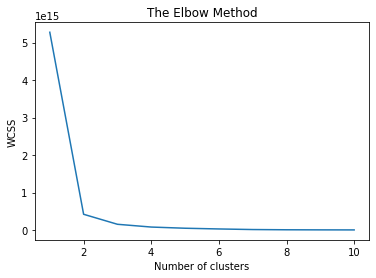

<Figure size 432x288 with 0 Axes>

In [87]:
wcss=[] # initializing an empty list

for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
    kmeans.fit(X) # fitting the data to the KMeans Algorithm
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.savefig('K-Means_Elbow.PNG') # saving the elbow plot locally
# finding the value of the optimum cluster programmatically
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
#self.logger_object.log(self.file_object, 'The optimum number of clusters is: '+str(self.kn.knee)+' . Exited the elbow_plot method of the KMeansClustering class')


In [88]:
number_of_clusters=kn.knee

In [89]:
number_of_clusters

2

In [90]:
kmeans

KMeans(n_clusters=10, random_state=42)

In [91]:
def create_clusters(data, number_of_clusters):


    kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
    
    #self.data = self.data[~self.data.isin([np.nan, np.inf, -np.inf]).any(1)]
    y_kmeans=kmeans.fit_predict(data) #  divide data into clusters

 
    data['Cluster']=y_kmeans  # create a new column in dataset for storing the cluster information
    return data

In [92]:
clustered_data_X=create_clusters(X, number_of_clusters)

In [93]:
clustered_data_X

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,Cluster
0,2.5,1,6,3,1,1,0,1,0,0,...,53300,0,5,1,1,2,6510,13020,52080,0
1,2.5,1,6,2,0,0,0,0,0,0,...,0,0,8,1,0,0,780,780,3510,1
2,1.0,0,7,2,0,0,0,0,0,0,...,35100,0,7,3,2,3,7700,3850,23100,1
3,2.5,0,7,3,0,0,1,0,0,0,...,48900,-62400,5,1,1,2,6340,6340,50720,1
4,5.0,1,5,2,0,0,0,0,0,0,...,66000,-46000,20,1,0,1,1300,650,4550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,4,2,1,0,0,1,0,0,...,0,0,20,1,0,1,17440,8720,61040,0
996,1.0,0,7,3,1,0,0,0,0,0,...,70900,0,23,1,2,3,18080,18080,72320,0
997,2.5,0,4,2,0,1,1,0,0,0,...,35100,0,4,3,2,3,7500,7500,52500,1
998,5.0,1,5,3,0,1,0,0,0,0,...,0,0,2,1,0,1,5220,5220,36540,1


In [106]:
clustered_data=clustered_data_X.copy()

In [156]:
model_directory="C:\\Users\\Devaraj\\Desktop\\Archive"
def save_model(model, filename):
    path = os.path.join(model_directory,filename) #create seperate directory for each cluster
    if os.path.isdir(path): #remove previously existing models for each clusters
        shutil.rmtree(model_directory)
        os.makedirs(path)
    else:
        os.makedirs(path) #
    with open(path +'/' + filename+'.sav',
              'wb') as f:
        pickle.dump(model, f) # save the model to file

In [157]:
import os, pickle, shutil
save_Model = save_model(kmeans, 'KMeans') # saving the KMeans model to directory                                                                   
# passing 'Model' as the functions need three parameters


In [109]:
clustered_data['Labels']=Y

In [110]:
clustered_data

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,Cluster,Labels
0,2.5,1,6,3,1,1,0,1,0,0,...,0,5,1,1,2,6510,13020,52080,0,1
1,2.5,1,6,2,0,0,0,0,0,0,...,0,8,1,0,0,780,780,3510,1,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,7,3,2,3,7700,3850,23100,1,0
3,2.5,0,7,3,0,0,1,0,0,0,...,-62400,5,1,1,2,6340,6340,50720,1,1
4,5.0,1,5,2,0,0,0,0,0,0,...,-46000,20,1,0,1,1300,650,4550,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,4,2,1,0,0,1,0,0,...,0,20,1,0,1,17440,8720,61040,0,0
996,1.0,0,7,3,1,0,0,0,0,0,...,0,23,1,2,3,18080,18080,72320,0,0
997,2.5,0,4,2,0,1,1,0,0,0,...,0,4,3,2,3,7500,7500,52500,1,0
998,5.0,1,5,3,0,1,0,0,0,0,...,0,2,1,0,1,5220,5220,36540,1,0


In [111]:
list_of_clusters=clustered_data['Cluster'].unique()

In [112]:
list_of_clusters

array([0, 1])

In [130]:
def scale_numerical_columns(data):


    num_df = data[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                      'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                      'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim',
                      'property_claim',
                      'vehicle_claim']]

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(num_df)
    scaled_num_df = pd.DataFrame(data=scaled_data, columns=num_df.columns,index=data.index)
    data.drop(columns=scaled_num_df.columns, inplace=True)
    data = pd.concat([scaled_num_df, data], axis=1)

    return data

In [149]:
def get_best_params_for_xgboost(train_x,train_y):

    # initializing with different combination of parameters
    param_grid_xgboost = {"n_estimators": [100, 130], 
                          "criterion": ['gini', 'entropy'], 
                          "max_depth": range(8, 10, 1)}
    
    
    # Creating an object of the Grid Search class
    grid= GridSearchCV(XGBClassifier(objective='binary:logistic'), param_grid_xgboost, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(train_x, train_y)

    # extracting the best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']

    # creating a new model with the best parameters
    xgb = XGBClassifier(criterion=criterion, max_depth=max_depth,n_estimators= n_estimators, n_jobs=-1 )
    # training the mew model
    xgb.fit(train_x, train_y)
    
    return xgb

In [150]:
def get_best_params_for_svm(train_x,train_y):

    # initializing with different combination of parameters
    param_grid = {"kernel": ['rbf', 'sigmoid'],
                  "C": [0.1, 0.5, 1.0],
                  "random_state": [0, 100, 200, 300]}
    
    sv_classifier=SVC()

    #Creating an object of the Grid Search class
    grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)
    #finding the best parameters
    grid.fit(train_x, train_y)

    #extracting the best parameters
    kernel = grid.best_params_['kernel']
    C = grid.best_params_['C']
    random_state = grid.best_params_['random_state']


    #creating a new model with the best parameters
    sv_classifier = SVC(kernel=kernel,C=C,random_state=random_state)
    # training the mew model
    sv_classifier.fit(train_x, train_y)
    
    return sv_classifier


In [151]:
def get_best_model(train_x,train_y,test_x,test_y):
      # create best model for XGBoost
    
    xgboost= get_best_params_for_xgboost(train_x,train_y)
    prediction_xgboost = xgboost.predict(test_x) # Predictions using the XGBoost Model
    
    #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
    if len(test_y.unique()) == 1: 
        xgboost_score = accuracy_score(test_y, prediction_xgboost)
        #logger_object.log(self.file_object, 'Accuracy for XGBoost:' + str(self.xgboost_score))  # Log AUC
    else:
        xgboost_score = roc_auc_score(test_y, prediction_xgboost) # AUC for XGBoost
        #logger_object.log(self.file_object, 'AUC for XGBoost:' + str(self.xgboost_score)) # Log AUC

    # create best model for Random Forest
    svm=get_best_params_for_svm(train_x,train_y)
    prediction_svm=svm.predict(test_x) # prediction using the SVM Algorithm

    if len(test_y.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        svm_score = accuracy_score(test_y,prediction_svm)
        #self.logger_object.log(self.file_object, 'Accuracy for SVM:' + str(self.sv_score))
    else:
        svm_score = roc_auc_score(test_y, prediction_svm) # AUC for Random Forest
        #self.logger_object.log(self.file_object, 'AUC for SVM:' + str(self.svm_score))

    #comparing the two models
    if(svm_score <  xgboost_score):
        return 'XGBoost',xgboost
    else:
        return 'SVM',sv_classifier

In [142]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [153]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier 
from sklearn.metrics import roc_auc_score, accuracy_score 
from sklearn.svm import SVC


In [158]:
"""parsing all the clusters and looking for the best ML algorithm to fit on individual cluster"""
#change X to clustered_data

for i in list_of_clusters:
    cluster_data=clustered_data[clustered_data['Cluster']==i] # filter the data for one cluster

    # Prepare the feature and Label columns
    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label= cluster_data['Labels']

    # splitting the data into training and test set for each cluster one by one
    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=355)
    # Proceeding with more data pre-processing steps
    x_train = scale_numerical_columns(x_train)
    x_test = scale_numerical_columns(x_test)


    #getting the best model for each of the clusters
    best_model_name,best_model=get_best_model(x_train,y_train,x_test,y_test)

    #saving the best model to the directory.
    
    save_model(best_model, best_model_name+str(i))


C:\Users\Devaraj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Devaraj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.2s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 1/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 2/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 3/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 4/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 5/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 1/5] END ............C=0.1, kernel=rbf, random_state=200; total time=   0.0s
[CV 2/5] END ............C=0.1, kernel=rbf, ran

[CV 2/5] END ..........C=1.0, kernel=sigmoid, random_state=0; total time=   0.0s
[CV 3/5] END ..........C=1.0, kernel=sigmoid, random_state=0; total time=   0.0s
[CV 4/5] END ..........C=1.0, kernel=sigmoid, random_state=0; total time=   0.0s
[CV 5/5] END ..........C=1.0, kernel=sigmoid, random_state=0; total time=   0.0s
[CV 1/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 2/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 3/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 4/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 5/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 1/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 2/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 3/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 4/5] END ........C=1.0, 

C:\Users\Devaraj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Devaraj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.0s
[CV 2/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.0s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.0s
[CV 4/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.0s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ..criterion=gini, max_depth=8, n_estimators=100; total time=   0.1s
[CV 1/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.1s
[CV 3/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.1s
[CV 5/5] END ..criterion=gini, max_depth=8, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s
[CV 2/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s

C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)



[CV 3/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s
[CV 5/5] END ..criterion=gini, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.1s
[CV 2/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.1s
[CV 4/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ..criterion=gini, max_depth=9, n_estimators=130; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.0s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=100; total time=   0.0s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=130; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.0s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=100; total time=   0.0s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=130; total time=   0.1s


C:\Users\Devaraj\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=rbf, random_state=0; total time=   0.0s
[CV 1/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 2/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 3/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 4/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 5/5] END ............C=0.1, kernel=rbf, random_state=100; total time=   0.0s
[CV 1/5] END ............C=0.1, kernel=rbf, random_state=200; total time=   0.0s
[CV 2/5] END ............C=0.1, kernel=rbf, ran

[CV 1/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 2/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 3/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 4/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 5/5] END ........C=1.0, kernel=sigmoid, random_state=100; total time=   0.0s
[CV 1/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 2/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 3/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 4/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 5/5] END ........C=1.0, kernel=sigmoid, random_state=200; total time=   0.0s
[CV 1/5] END ........C=1.0, kernel=sigmoid, random_state=300; total time=   0.0s
[CV 2/5] END ........C=1.0, kernel=sigmoid, random_state=300; total time=   0.0s
[CV 3/5] END ........C=1.0, 